In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc,precision_recall_curve, accuracy_score, \
recall_score, precision_score, confusion_matrix, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
import itertools as it
import time as time
import xgboost as xgb
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, acf
from statsmodels.graphics.tsaplots import plot_pacf, pacf
import holidays
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pmdarima.arima import auto_arima

In [11]:
pip install pmdarima

     |████████████████████████████████| 656 kB 2.0 MB/s eta 0:00:01
You should consider upgrading via the '/Users/emilyzhang/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
east = pd.read_csv('final data/east_daily.csv')
midwest = pd.read_csv('final data/midwest_stationary.csv')
south = pd.read_csv('final data/south_stationary.csv')
west = pd.read_csv('final data/west_stationary.csv')

# stationary analysis check: all stationary

In [4]:
X = east.daily_deaths
result = adfuller(X)
print('East ADF Statistic: %f' % result[0])
print('East p-value: %f' % result[1])
print('East Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

X = midwest.daily_deaths
result = adfuller(X)
print('Midwest ADF Statistic: %f' % result[0])
print('Midwest p-value: %f' % result[1])
print('Midwest Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

X = south.daily_deaths
result = adfuller(X)
print('South ADF Statistic: %f' % result[0])
print('South p-value: %f' % result[1])
print('South Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

X = west.daily_deaths
result = adfuller(X)
print('West ADF Statistic: %f' % result[0])
print('West p-value: %f' % result[1])
print('West Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

East ADF Statistic: -3.842138
East p-value: 0.002504
East Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Midwest ADF Statistic: -6.612100
Midwest p-value: 0.000000
Midwest Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
South ADF Statistic: -6.157430
South p-value: 0.000000
South Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
West ADF Statistic: -5.691688
West p-value: 0.000001
West Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


# loading the data

In [5]:
### 4 regions
east=pd.read_csv('final data/east_daily.csv', index_col=0, parse_dates=[0])
print(east.shape)
east.tail()

(1136, 1)


,daily_deaths
date,
2023-03-19,0
2023-03-20,7
2023-03-21,14
2023-03-22,266
2023-03-23,80


In [6]:
### 4 regions
midwest=pd.read_csv('final data/midwest_stationary.csv', index_col=0, parse_dates=[0])
print(midwest.shape)
midwest.tail()

(1136, 1)


,daily_deaths
date,
2023-03-19,0.0
2023-03-20,23.0
2023-03-21,108.0
2023-03-22,-91.0
2023-03-23,192.0


In [7]:
### 4 regions
south=pd.read_csv('final data/south_stationary.csv', index_col=0, parse_dates=[0])
print(south.shape)
south.tail()

(1136, 1)


,daily_deaths
date,
2023-03-19,0.0
2023-03-20,71.0
2023-03-21,-40.0
2023-03-22,209.0
2023-03-23,-182.0


In [8]:
### 4 regions
west=pd.read_csv('final data/west_stationary.csv', index_col=0, parse_dates=[0])
print(east.shape)
west.tail()

(1136, 1)


,daily_deaths
date,
2023-03-19,0.0
2023-03-20,37.0
2023-03-21,-4.0
2023-03-22,151.0
2023-03-23,-95.0


# making the train data -> train on 2020 and 2021 data

In [9]:
easttrain = east[east.index < '2023-01-01']
easttest = east[east.index >= '2023-01-01']
print(easttrain.shape, easttest.shape)

(1054, 1) (82, 1)


In [10]:
midwesttrain = midwest[midwest.index < '2023-01-01']
midwesttest = midwest[midwest.index >= '2023-01-01']
print(midwesttrain.shape, midwesttest.shape)

(1054, 1) (82, 1)


In [11]:
southtrain = south[south.index < '2023-01-01']
southtest = south[south.index >= '2023-01-01']
print(southtrain.shape, southtest.shape)

(1054, 1) (82, 1)


In [12]:
westtrain = west[west.index < '2023-01-01']
westtest = west[west.index >= '2023-01-01']
print(westtrain.shape, westtest.shape)

(1054, 1) (82, 1)


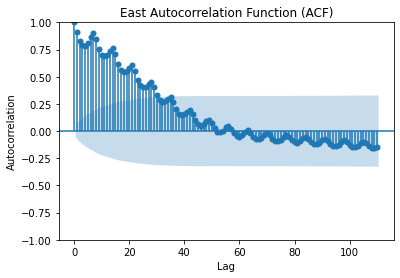

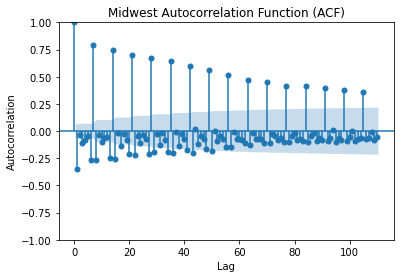

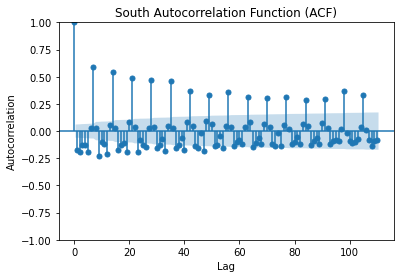

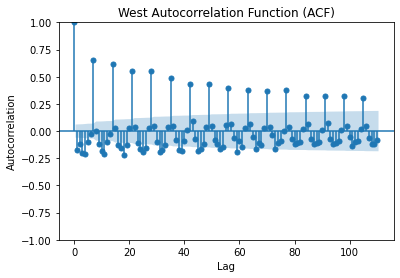

In [13]:
plot_acf(easttrain['daily_deaths'], lags = 110) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('East Autocorrelation Function (ACF)')
plt.show()

plot_acf(midwesttrain['daily_deaths'], lags = 110) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Midwest Autocorrelation Function (ACF)')
plt.show()

plot_acf(southtrain['daily_deaths'], lags = 110) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('South Autocorrelation Function (ACF)')
plt.show()

plot_acf(westtrain['daily_deaths'], lags = 110) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('West Autocorrelation Function (ACF)')
plt.show()

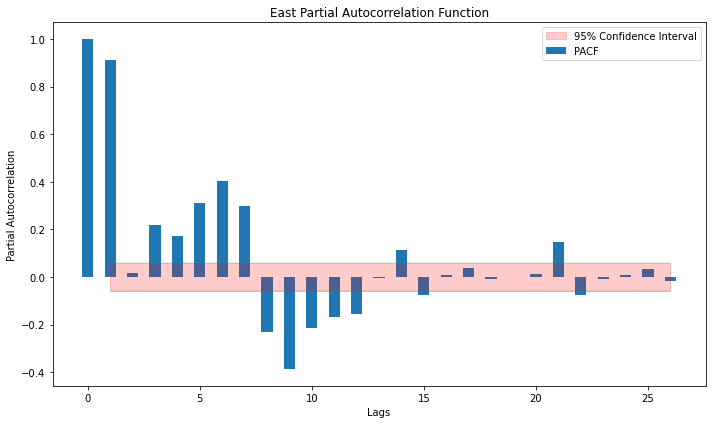

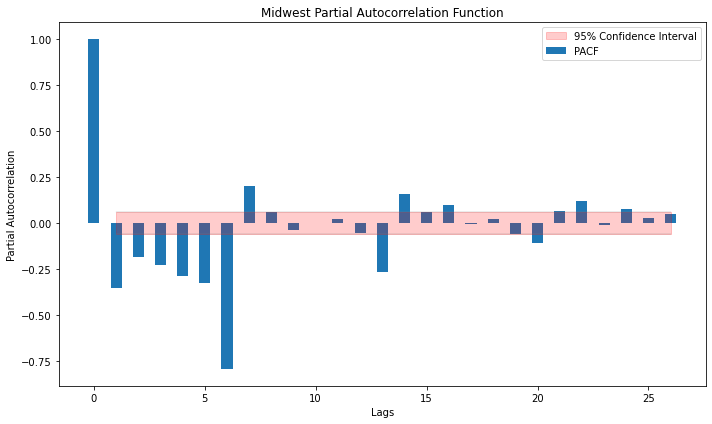

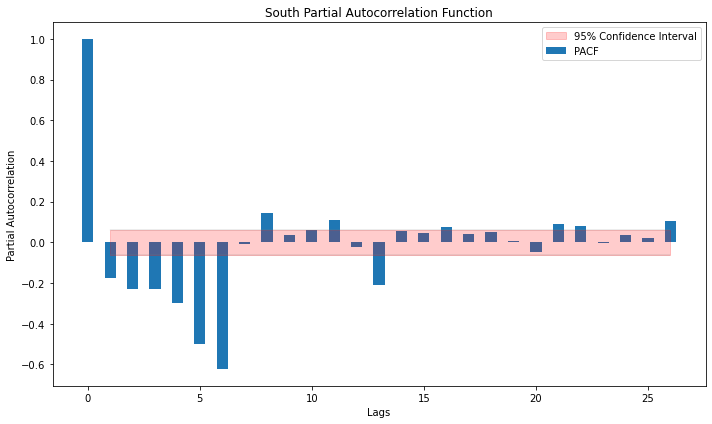

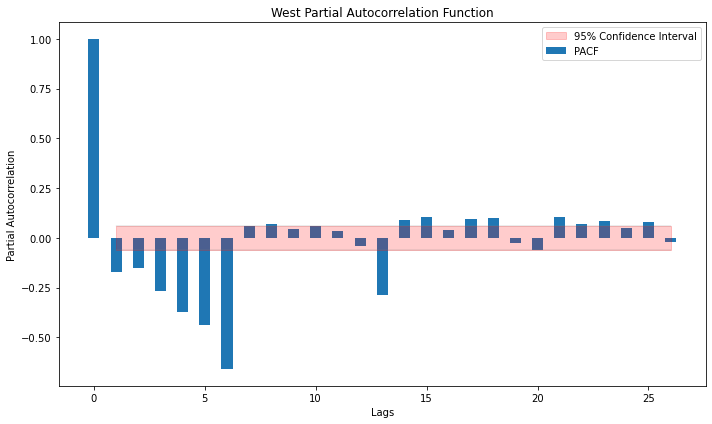

In [14]:
pacf_values, confint = pacf(easttrain['daily_deaths'], alpha=0.05, nlags=26)
lags = np.arange(0, len(pacf_values))
lower_bound = confint[1:, 0] - pacf_values[1:]
upper_bound = confint[1:, 1] - pacf_values[1:]
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(lags, pacf_values, width=0.5, align='center', label='PACF')
ax.fill_between(lags[1:], lower_bound, upper_bound, color='red', alpha=0.2, label='95% Confidence Interval')
ax.plot(lags[1:], upper_bound, color='grey', lw=0.3)
ax.plot(lags[1:], lower_bound, color='grey', lw=0.3)
ax.set_xlabel('Lags')
ax.set_ylabel('Partial Autocorrelation')
ax.set_title('East Partial Autocorrelation Function')
ax.legend()
plt.tight_layout()
plt.show()

pacf_values, confint = pacf(midwesttrain['daily_deaths'], alpha=0.05, nlags=26)
lags = np.arange(0, len(pacf_values))
lower_bound = confint[1:, 0] - pacf_values[1:]
upper_bound = confint[1:, 1] - pacf_values[1:]
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(lags, pacf_values, width=0.5, align='center', label='PACF')
ax.fill_between(lags[1:], lower_bound, upper_bound, color='red', alpha=0.2, label='95% Confidence Interval')
ax.plot(lags[1:], upper_bound, color='grey', lw=0.3)
ax.plot(lags[1:], lower_bound, color='grey', lw=0.3)
ax.set_xlabel('Lags')
ax.set_ylabel('Partial Autocorrelation')
ax.set_title('Midwest Partial Autocorrelation Function')
ax.legend()
plt.tight_layout()
plt.show()

pacf_values, confint = pacf(southtrain['daily_deaths'], alpha=0.05, nlags=26)
lags = np.arange(0, len(pacf_values))
lower_bound = confint[1:, 0] - pacf_values[1:]
upper_bound = confint[1:, 1] - pacf_values[1:]
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(lags, pacf_values, width=0.5, align='center', label='PACF')
ax.fill_between(lags[1:], lower_bound, upper_bound, color='red', alpha=0.2, label='95% Confidence Interval')
ax.plot(lags[1:], upper_bound, color='grey', lw=0.3)
ax.plot(lags[1:], lower_bound, color='grey', lw=0.3)
ax.set_xlabel('Lags')
ax.set_ylabel('Partial Autocorrelation')
ax.set_title('South Partial Autocorrelation Function')
ax.legend()
plt.tight_layout()
plt.show()

pacf_values, confint = pacf(westtrain['daily_deaths'], alpha=0.05, nlags=26)
lags = np.arange(0, len(pacf_values))
lower_bound = confint[1:, 0] - pacf_values[1:]
upper_bound = confint[1:, 1] - pacf_values[1:]
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(lags, pacf_values, width=0.5, align='center', label='PACF')
ax.fill_between(lags[1:], lower_bound, upper_bound, color='red', alpha=0.2, label='95% Confidence Interval')
ax.plot(lags[1:], upper_bound, color='grey', lw=0.3)
ax.plot(lags[1:], lower_bound, color='grey', lw=0.3)
ax.set_xlabel('Lags')
ax.set_ylabel('Partial Autocorrelation')
ax.set_title('West Partial Autocorrelation Function')
ax.legend()
plt.tight_layout()
plt.show()

# ARIMA

- using a p value of 3 because there are spikes at lag 1, 2, and 3 in the PACF plots

### east

/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


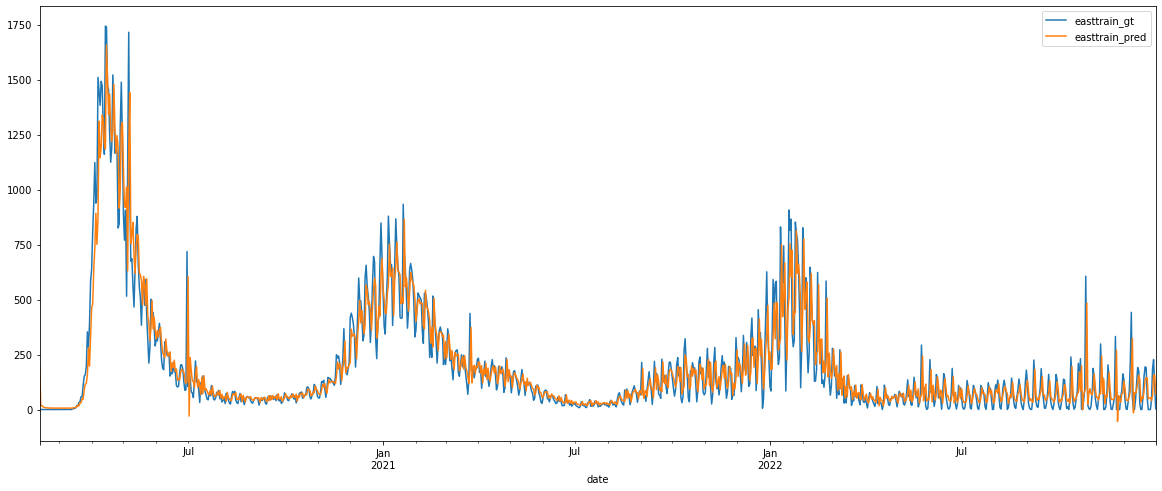

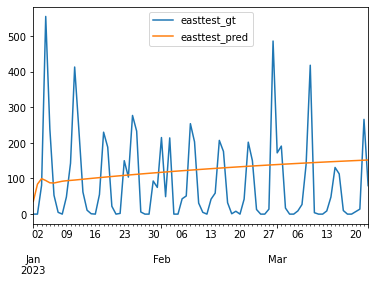

Training Set Metrics:
RMSE: 101.115727424792
R-squared: 0.8550393201014572
MAE: 59.562884589954386

Testing Set Metrics:
RMSE: 127.91580938464047
R-squared: -0.1335374151655746
MAE: 107.0945427954892


In [16]:
emodel = ARIMA(easttrain, order=(3, 0, 1))
emodel=emodel.fit()

easttrain_pred=emodel.fittedvalues
pd.concat([easttrain, easttrain_pred], axis=1).plot(figsize=(20, 8))
plt.legend(['easttrain_gt', 'easttrain_pred'])
plt.show()

easttest_pred=emodel.predict(start=len(easttrain), end=len(easttrain)+len(easttest)-1, dynamic=True)
pd.concat([easttest, easttest_pred], axis=1).plot()
plt.legend(['easttest_gt', 'easttest_pred'])
plt.show()

# Calculate RMSE, R-squared, and MAE for the training set
rmse_train = np.sqrt(mean_squared_error(easttrain, easttrain_pred))
r2_train = r2_score(easttrain, easttrain_pred)
mae_train = mean_absolute_error(easttrain, easttrain_pred)

print("Training Set Metrics:")
print("RMSE:", rmse_train)
print("R-squared:", r2_train)
print("MAE:", mae_train)

# Calculate RMSE, R-squared, and MAE for the testing set
rmse_test = np.sqrt(mean_squared_error(easttest, easttest_pred))
r2_test = r2_score(easttest, easttest_pred)
mae_test = mean_absolute_error(easttest, easttest_pred)

print("\nTesting Set Metrics:")
print("RMSE:", rmse_test)
print("R-squared:", r2_test)
print("MAE:", mae_test)

## midwest

/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


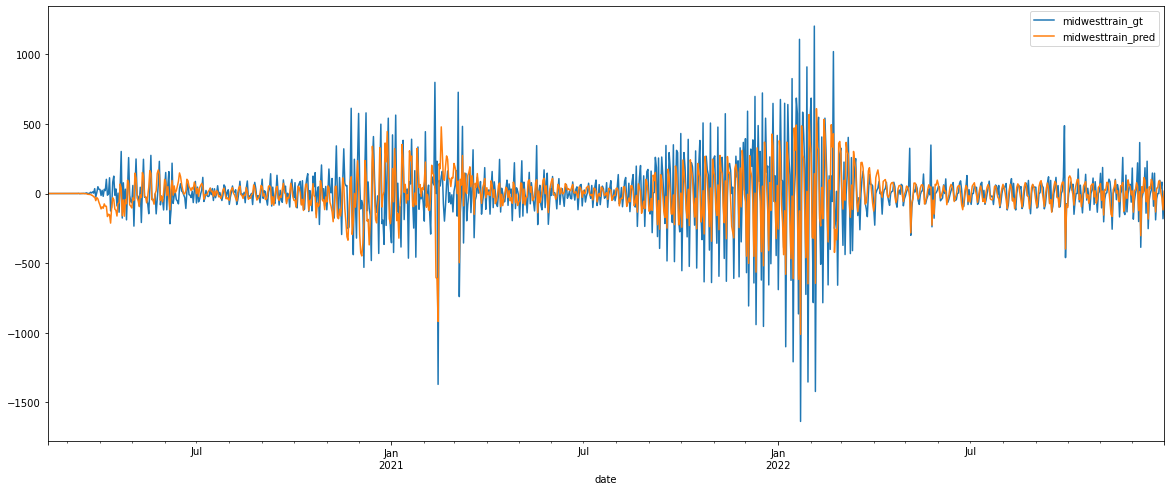

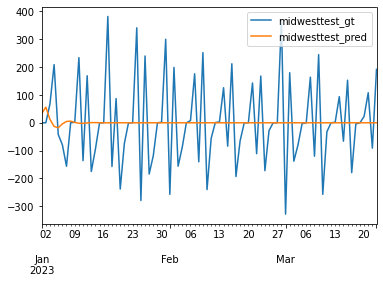

Training Set Metrics:
RMSE: 181.56874760119138
R-squared: 0.41128350177298467
MAE: 114.9758260201988

Testing Set Metrics:
RMSE: 154.9975338840161
R-squared: -0.0049111918172459745
MAE: 116.49620707084301


In [18]:
mmodel = ARIMA(midwesttrain, order=(3, 0, 1))
mmodel=mmodel.fit()

midwesttrain_pred=mmodel.fittedvalues
pd.concat([midwesttrain, midwesttrain_pred], axis=1).plot(figsize=(20, 8))
plt.legend(['midwesttrain_gt', 'midwesttrain_pred'])
plt.show()

midwesttest_pred=mmodel.predict(start=len(midwesttrain), end=len(midwesttrain)+len(midwesttest)-1, dynamic=True)
pd.concat([midwesttest, midwesttest_pred], axis=1).plot()
plt.legend(['midwesttest_gt', 'midwesttest_pred'])
plt.show()

# Calculate RMSE, R-squared, and MAE for the training set
rmse_train = np.sqrt(mean_squared_error(midwesttrain, midwesttrain_pred))
r2_train = r2_score(midwesttrain, midwesttrain_pred)
mae_train = mean_absolute_error(midwesttrain, midwesttrain_pred)

print("Training Set Metrics:")
print("RMSE:", rmse_train)
print("R-squared:", r2_train)
print("MAE:", mae_train)

# Calculate RMSE, R-squared, and MAE for the testing set
rmse_test = np.sqrt(mean_squared_error(midwesttest, midwesttest_pred))
r2_test = r2_score(midwesttest, midwesttest_pred)
mae_test = mean_absolute_error(midwesttest, midwesttest_pred)

print("\nTesting Set Metrics:")
print("RMSE:", rmse_test)
print("R-squared:", r2_test)
print("MAE:", mae_test)

## south

/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


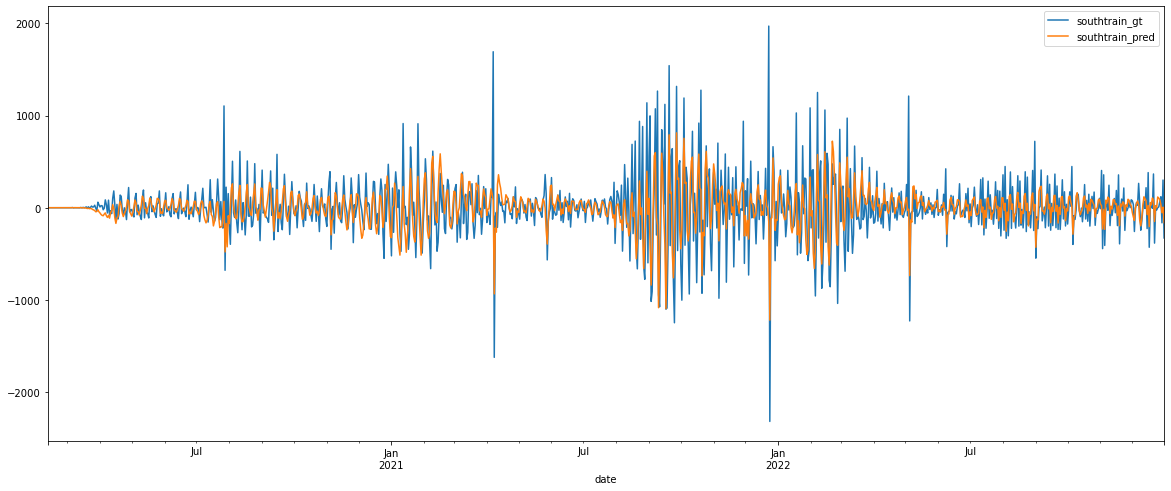

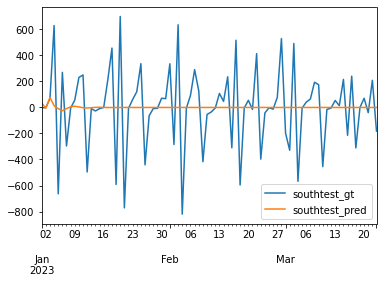

Training Set Metrics:
RMSE: 262.97738262894956
R-squared: 0.3575497002536058
MAE: 169.84613205491348

Testing Set Metrics:
RMSE: 305.8107854725418
R-squared: 0.0035244038289785617
MAE: 213.01836411929236


In [20]:
smodel = ARIMA(southtrain, order=(3, 0, 1))
smodel=smodel.fit()

southtrain_pred=smodel.fittedvalues
pd.concat([southtrain, southtrain_pred], axis=1).plot(figsize=(20, 8))
plt.legend(['southtrain_gt', 'southtrain_pred'])
plt.show()

southtest_pred=smodel.predict(start=len(southtrain), end=len(southtrain)+len(southtest)-1, dynamic=True)
pd.concat([southtest, southtest_pred], axis=1).plot()
plt.legend(['southtest_gt', 'southtest_pred'])
plt.show()

# Calculate RMSE, R-squared, and MAE for the training set
rmse_train = np.sqrt(mean_squared_error(southtrain, southtrain_pred))
r2_train = r2_score(southtrain, southtrain_pred)
mae_train = mean_absolute_error(southtrain, southtrain_pred)

print("Training Set Metrics:")
print("RMSE:", rmse_train)
print("R-squared:", r2_train)
print("MAE:", mae_train)

# Calculate RMSE, R-squared, and MAE for the testing set
rmse_test = np.sqrt(mean_squared_error(southtest, southtest_pred))
r2_test = r2_score(southtest, southtest_pred)
mae_test = mean_absolute_error(southtest, southtest_pred)

print("\nTesting Set Metrics:")
print("RMSE:", rmse_test)
print("R-squared:", r2_test)
print("MAE:", mae_test)

## west

/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/emilyzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


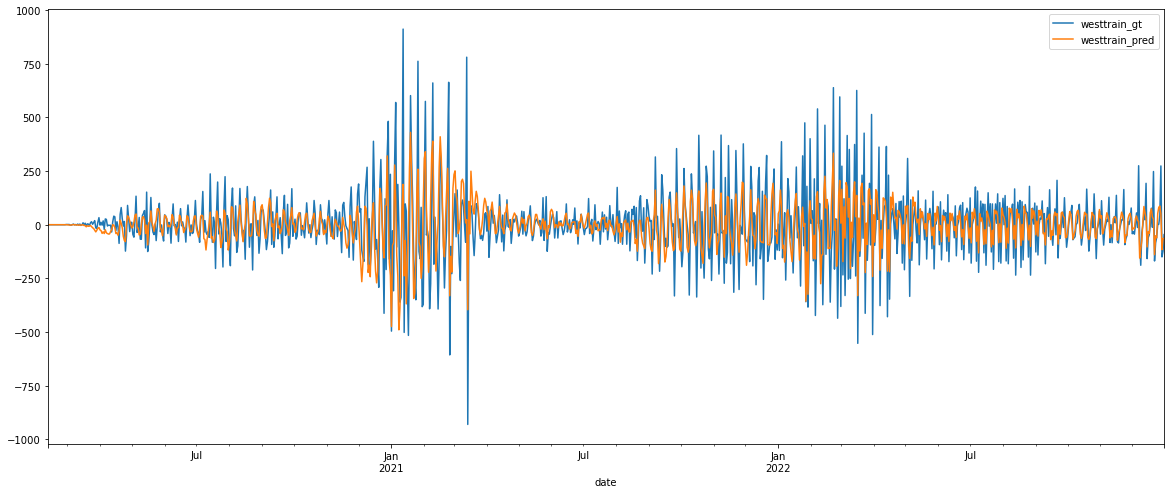

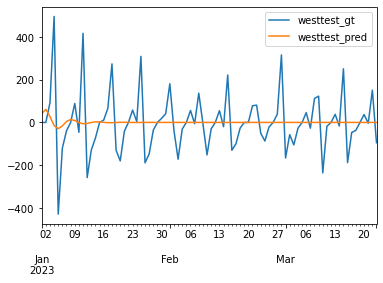

Training Set Metrics:
RMSE: 122.68674017855069
R-squared: 0.3802334965583104
MAE: 82.60756648934816

Testing Set Metrics:
RMSE: 139.24148520176328
R-squared: 0.005437967620604445
MAE: 92.37781007786974


In [22]:
wmodel = ARIMA(westtrain, order=(3, 0, 1))
wmodel=wmodel.fit()

westtrain_pred=wmodel.fittedvalues
pd.concat([westtrain, westtrain_pred], axis=1).plot(figsize=(20, 8))
plt.legend(['westtrain_gt', 'westtrain_pred'])
plt.show()

westtest_pred=wmodel.predict(start=len(westtrain), end=len(westtrain)+len(westtest)-1, dynamic=True)
pd.concat([westtest, westtest_pred], axis=1).plot()
plt.legend(['westtest_gt', 'westtest_pred'])
plt.show()

# Calculate RMSE, R-squared, and MAE for the training set
rmse_train = np.sqrt(mean_squared_error(westtrain, westtrain_pred))
r2_train = r2_score(westtrain, westtrain_pred)
mae_train = mean_absolute_error(westtrain, westtrain_pred)

print("Training Set Metrics:")
print("RMSE:", rmse_train)
print("R-squared:", r2_train)
print("MAE:", mae_train)

# Calculate RMSE, R-squared, and MAE for the testing set
rmse_test = np.sqrt(mean_squared_error(westtest, westtest_pred))
r2_test = r2_score(westtest, westtest_pred)
mae_test = mean_absolute_error(westtest, westtest_pred)

print("\nTesting Set Metrics:")
print("RMSE:", rmse_test)
print("R-squared:", r2_test)
print("MAE:", mae_test)

Combined RMSE: 484.52770898889474
Combined R-squared: -0.01770314946230256
Combined MAE: 332.34921751517237


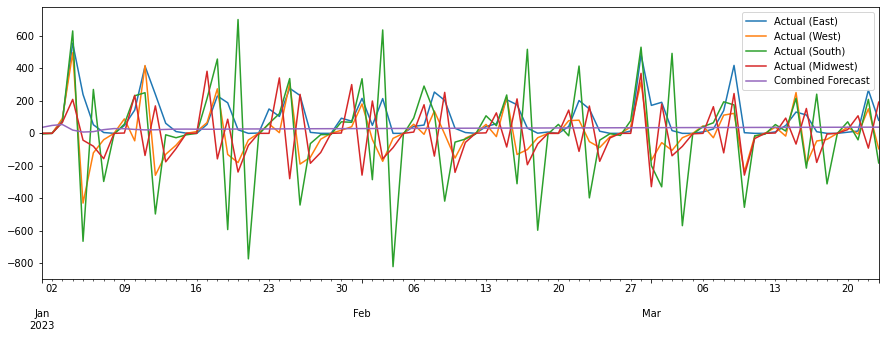

In [23]:
combined_forecast = (easttest_pred + westtest_pred + southtest_pred + midwesttest_pred) / 4

# Evaluate and fine-tune as needed
actual_values_combined = easttest['daily_deaths'].values + westtest['daily_deaths'].values + southtest['daily_deaths'].values + midwesttest['daily_deaths'].values

predicted_values_combined = combined_forecast.values

# Calculate RMSE
rmse_combined = np.sqrt(mean_squared_error(actual_values_combined, predicted_values_combined))

# Calculate R-squared
r_squared_combined = r2_score(actual_values_combined, predicted_values_combined)

# Calculate MAE
mae_combined = mean_absolute_error(actual_values_combined, predicted_values_combined)

# Print or use the metrics as needed
print(f"Combined RMSE: {rmse_combined}")
print(f"Combined R-squared: {r_squared_combined}")
print(f"Combined MAE: {mae_combined}")

# Combine actual values for plotting
actual_values_combined = pd.concat([easttest['daily_deaths'], westtest['daily_deaths'], southtest['daily_deaths'], midwesttest['daily_deaths']], axis=1)
actual_values_combined.columns = ['East', 'West', 'South', 'Midwest']

# Plot the actual values and combined forecast
pd.concat([actual_values_combined, combined_forecast], axis=1).plot(figsize=(15, 5))
plt.legend(['Actual (East)', 'Actual (West)', 'Actual (South)', 'Actual (Midwest)', 'Combined Forecast'])
plt.show()
